In [7]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
covidTweets = pd.read_csv("covid19_tweets1.csv")

In [8]:
df = pd.read_csv("covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


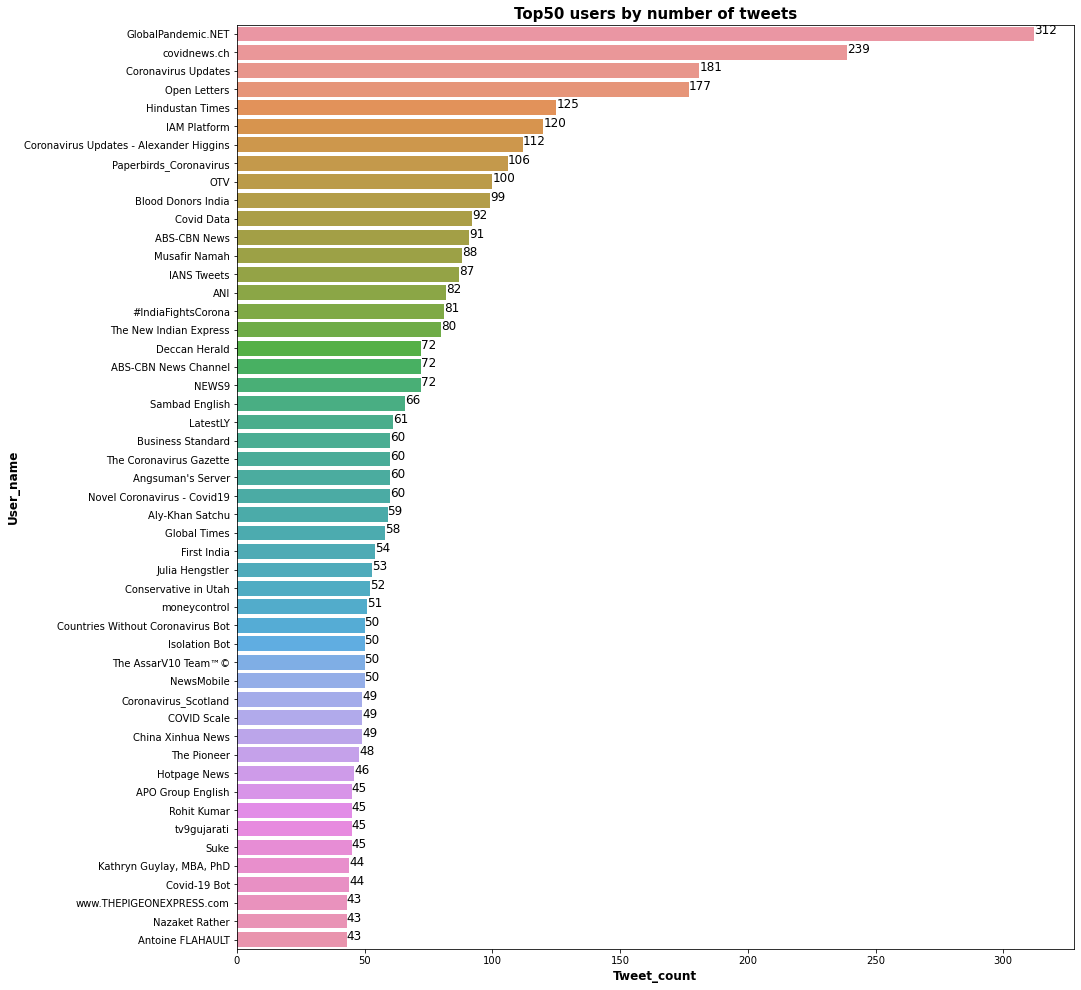

In [9]:
df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='tweet_count',data=df_username_count.head(50))
y=df_username_count['tweet_count'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of tweets',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Tweet_count', size=12, weight='bold')
plt.show()

In [26]:
#df.sort_values(by='user_followers', ascending = False)

sortedDf = df.sort_values(by= "user_followers", ascending = False)
topUsersByFollowers = []
for index, row in sortedDf.iterrows():
    if row.user_name not in topUsersByFollowers:
        topUsersByFollowers.append(row.user_name)
    if len(topUsersByFollowers) == 50:
        break
        

['CGTN', 'NDTV', 'The Times Of India', 'United Nations', 'China Xinhua News', 'ABP News', 'Ivanka Trump', 'UNICEF', 'World Health Organization (WHO)', 'Hindustan Times', 'Shashi Tharoor', 'Anonymous', "People's Daily, China", 'ABS-CBN News', 'The Hindu', 'SkyNews', 'Department of Defense 🇺🇸', 'El Universal', 'IndiaToday', 'Zee News English', 'Filmfare', 'ABS-CBN News Channel', 'VANITY FAIR', 'ANI', 'CNNNews18', 'Ravi Shankar Prasad', 'China Daily', 'Cricbuzz', 'POLITICO', 'Vasundhara Raje', 'Dr. Mehmet Oz', 'World Economic Forum', 'Economic Times', 'The Indian Express', 'Karen Davila', 'World Bank', 'UNESCO', 'CM Office, GoUP', 'Tony Robbins', 'Sahara Reporters', 'RT', 'CDC', 'DD News', 'UN Human Rights', 'Press Trust of India', 'BBC News Africa', 'The Telegraph', 'Naveen Patnaik', 'ARY News', 'Ministry of HRD']
